In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
elephant = cv2.imread('elephant.jfif', 0)
elephant.shape

(234, 348)

In [3]:
elephant = cv2.resize(elephant, (200, 200), interpolation=cv2.INTER_AREA)

In [4]:
def plot_native_size(image):
    # Get the dimensions of the image
    height, width = image.shape

    # Create a figure with the same size as the image
    _, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=100)

    # Display the image
    ax.imshow(image, cmap='gray', vmin=0, vmax=255)
    ax.axis('off')  # Hide the axes

Gaussian pyramid

(100, 100)
(50, 50)
(25, 25)


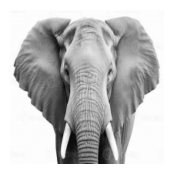

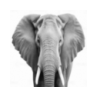

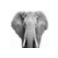

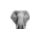

In [5]:
layer = elephant.copy()

plot_native_size(layer)

for i in range(3):
    layer = cv2.pyrDown(layer)

    print(layer.shape)
    plot_native_size(layer)

Laplacian pyramid

In [6]:
def create_pyramids(image, layers):
    layer = image.copy()
    gaussian_pyramid = [layer]
    for i in range(layers):
        layer = cv2.pyrDown(layer)
        gaussian_pyramid.append(layer)
        print(gaussian_pyramid[i].shape)

    laplacian_pyramid = []
    for i in range(layers - 1):
        expanded = cv2.pyrUp(gaussian_pyramid[i + 1], dstsize=(gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]))
        laplacian = cv2.subtract(gaussian_pyramid[i].astype(float), expanded.astype(float))
        laplacian_pyramid.append(laplacian)
    laplacian_pyramid.append(gaussian_pyramid[layers - 1])

    return gaussian_pyramid, laplacian_pyramid

(200, 200)
(100, 100)
(50, 50)
(25, 25)


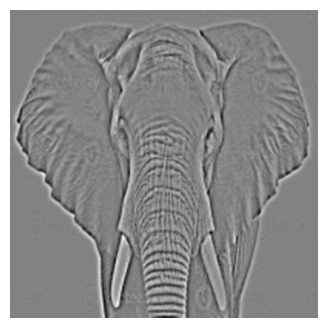

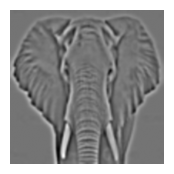

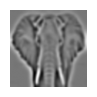

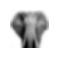

In [7]:
_, elephant_laplacian_pyramid = create_pyramids(elephant, 4)

for layer in elephant_laplacian_pyramid:
    layer = cv2.pyrUp(layer)

    layer_scaled = layer - layer.min()
    layer_scaled = layer_scaled / layer_scaled.max() * 255
    layer_scaled = layer_scaled.astype(np.uint8)
    plot_native_size(layer_scaled)

reconstruct

In [8]:
# actual image on lowest resolution
reconstruct_from_lp = elephant_laplacian_pyramid[-1]

for i in range(len(elephant_laplacian_pyramid) - 1, 0, -1):
    reconstruct_from_lp = cv2.pyrUp(reconstruct_from_lp)
    reconstruct_from_lp = cv2.add(reconstruct_from_lp.astype(float), elephant_laplacian_pyramid[i-1])

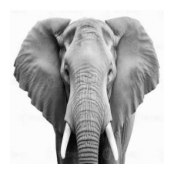

In [9]:
reconstruct_from_lp_scaled = reconstruct_from_lp - reconstruct_from_lp.min()
reconstruct_from_lp_scaled = reconstruct_from_lp_scaled / reconstruct_from_lp_scaled.max() * 255
reconstruct_from_lp_scaled = reconstruct_from_lp_scaled.astype(np.uint8)

plot_native_size(reconstruct_from_lp_scaled)

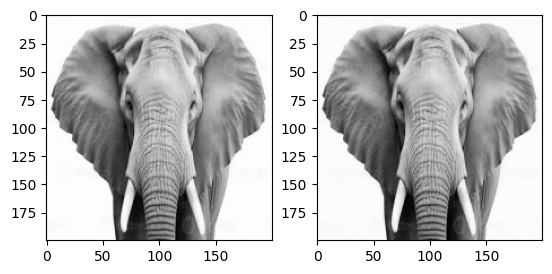

In [10]:
plt.subplot(121)
plt.imshow(elephant, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(reconstruct_from_lp_scaled, cmap='gray', vmin=0, vmax=255)

image blending with pyramids:

In [11]:
lion = cv2.imread('lion.jfif', 0)
lion = cv2.resize(lion, (200, 200), interpolation=cv2.INTER_AREA)

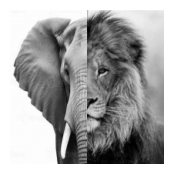

In [12]:
# image with direct connecting each half
real = np.hstack((elephant[:, :200 // 2], lion[:, 200 // 2:]))

plot_native_size(real)

In [13]:
gpA, lpA = create_pyramids(elephant, 4)
gpB, lpB = create_pyramids(lion, 4)

(200, 200)
(100, 100)
(50, 50)
(25, 25)
(200, 200)
(100, 100)
(50, 50)
(25, 25)


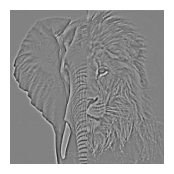

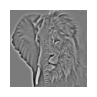

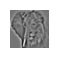

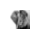

In [14]:
# Now add left and right halves of images in each level
LS = []
for la, lb in zip(lpA, lpB):
    rows, cols = la.shape
    ls = np.hstack((la[:, :cols // 2], lb[:, cols // 2:]))
    LS.append(ls)

    layer_scaled = ls - ls.min()
    layer_scaled = layer_scaled / layer_scaled.max() * 255
    layer_scaled = layer_scaled.astype(np.uint8)
    plot_native_size(layer_scaled)

In [15]:
# actual image on lowest resolution
reconstruct_from_lp = LS[-1]

for i in range(len(LS) - 1, 0, -1):
    reconstruct_from_lp = cv2.pyrUp(reconstruct_from_lp)
    reconstruct_from_lp = cv2.add(reconstruct_from_lp.astype(float), LS[i-1])

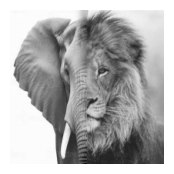

In [16]:
reconstruct_from_lp_scaled = reconstruct_from_lp - reconstruct_from_lp.min()
reconstruct_from_lp_scaled = reconstruct_from_lp_scaled / reconstruct_from_lp_scaled.max() * 255
reconstruct_from_lp_scaled = reconstruct_from_lp_scaled.astype(np.uint8)

plot_native_size(reconstruct_from_lp_scaled)

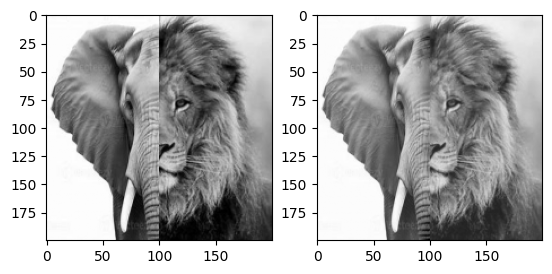

In [17]:
plt.subplot(121)
plt.imshow(real, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(reconstruct_from_lp_scaled, cmap='gray', vmin=0, vmax=255)